In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Reading an image

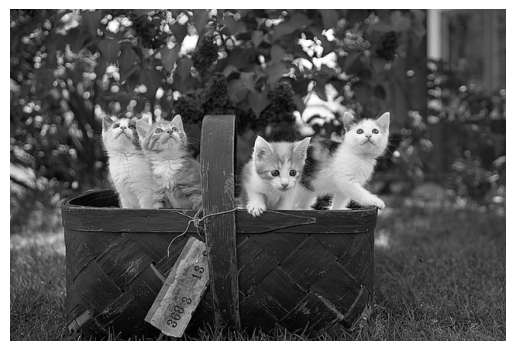

In [2]:
img = cv.cvtColor(cv.imread('Photos/cats.jpg'),cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

#### A little about contours
Contours are different from edges. Many a times, we can get away the differences by assuming them to be the same. However, mathematically speaking and not from a programming sense, they are different.

# Contour detection using canny edge detector

#### Edge detection using canny edge detector

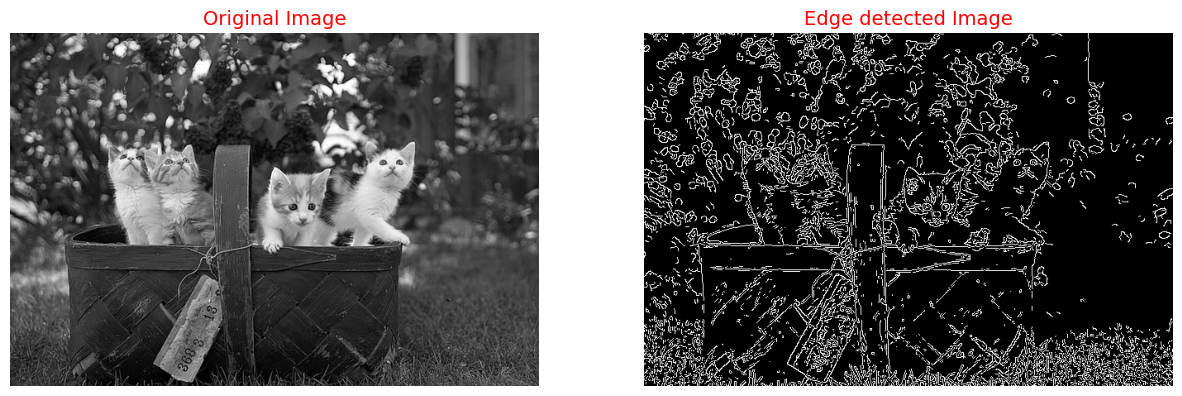

In [3]:
thres_val = np.array([125,175])
img_canny = cv.Canny(img,thres_val[0],thres_val[1])

fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original Image',fontsize=14,color='red')
ax[0].axis('off')

ax[1].imshow(img_canny,cmap='gray')
ax[1].set_title('Edge detected Image',fontsize=14,color='red')
ax[1].axis('off')
plt.show()

##### Contour detection for a raw image

In [4]:
contours_raw,hierarchies_raw = cv.findContours(img_canny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)

print('No of contours are = '+str(len(contours_raw)))

No of contours are = 2484


##### Contour detection for a blurred image

In [5]:
img_blurred = cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT)
img_blurred_canny = cv.Canny(img_blurred,thres_val[0],thres_val[1])

contours_blurred,hierarchies_blurred = cv.findContours(img_blurred_canny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print('No of contours are = '+str(len(contours_blurred)))

No of contours are = 379


#### Note
Once we blur the image, we can significantly less number of edges within the image

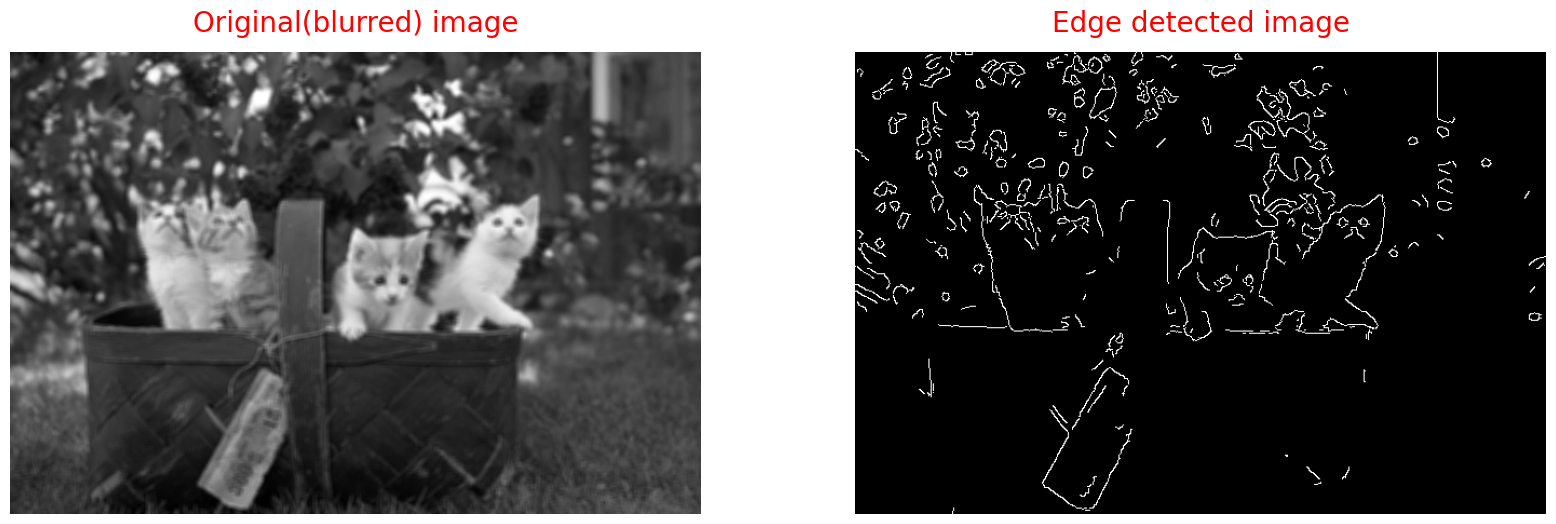

In [6]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
ax[0].imshow(img_blurred,cmap='gray')
ax[0].set_title('Original(blurred) image',fontsize=20,color='red',pad=15)
ax[0].axis('off')

ax[1].imshow(img_blurred_canny,cmap='gray')
ax[1].set_title('Edge detected image',fontsize=20,color='red',pad=15)
ax[1].axis('off')

plt.show()

# Contour detection using thresholding

In [7]:
thres_val = 125
max_val = 255
ret,img_thres = cv.threshold(img,thres_val,max_val,cv.THRESH_BINARY)

contours_thres,hierarchies_thres = cv.findContours(img_thres,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print('No of contours = '+str(len(contours_thres)))

No of contours = 839


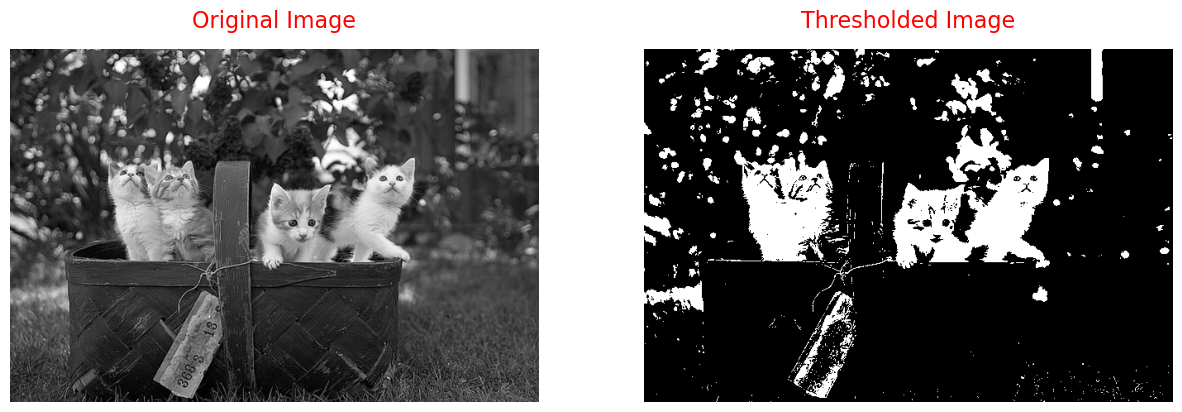

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

# Original Image
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original Image',fontsize=16,color='red',pad=15)
ax[0].axis('off')

# Thresholded Image
ax[1].imshow(img_thres,cmap='gray')
ax[1].set_title('Thresholded Image',fontsize=16,color='red',pad=15)
ax[1].axis('off')

plt.show()

## Visualizing the contours

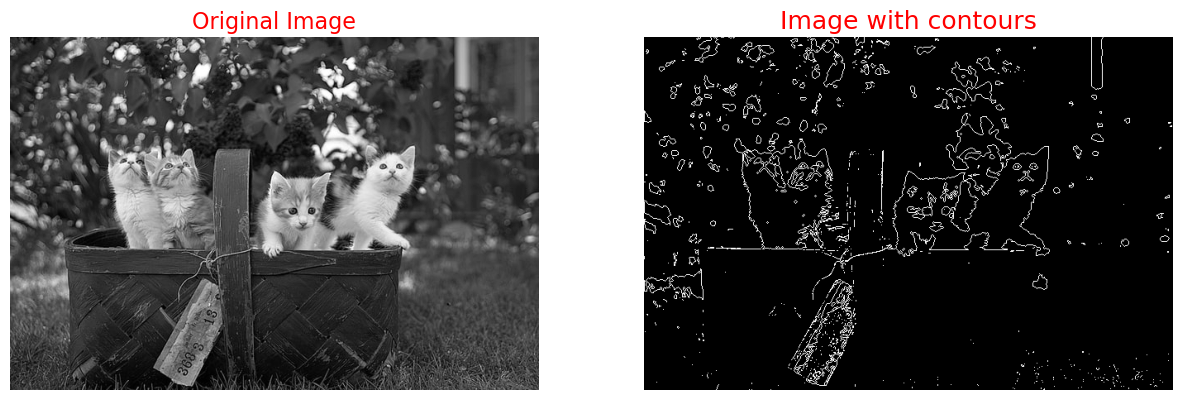

In [14]:
# Creating a blank image
img_blank = np.zeros(img.shape,dtype='uint8')
img_contours = cv.drawContours(img_blank,contours_thres,-1,(255,0,0),1)

fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original Image',fontsize=16,color='red')
ax[0].axis('off')

ax[1].imshow(img_contours,cmap='gray')
ax[1].set_title('Image with contours',fontsize=18,color='red')
ax[1].axis('off')

plt.show()